# *This project focuses on cleaning, analyzing, visualizing, and extracting key insights from the IMDb dataset*
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

# Display the first 5 rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Cleaning

In [3]:
# Check data types
print(df.dtypes)
print(" ")
print(df.shape)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
 
(1000, 16)


In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
# Clean and convert 'Gross' to numeric
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Clean and convert 'Runtime' to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Convert 'Released_Year' to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [6]:
# Check data types
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify missing values
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [8]:
df.shape

(713, 16)

In [9]:
# Remove duplicate rows if needed
df.drop_duplicates(inplace=True)

df.shape

(713, 16)

## Data Analysis

In [10]:
# Summary statistics for numeric columns
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,1995.736325,123.692847,7.937588,77.158485,3.562568e+05,7.837989e+07
std,18.598222,25.898509,0.293211,12.409849,3.541346e+05,1.150031e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1987.000000,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.363110e+05,3.470029e+07
75%,2010.000000,136.000000,8.100000,86.000000,5.084170e+05,1.023089e+08
max,2019.000000,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [11]:
# Top 10 Highest Rated Movies
# Sort by IMDb rating and display the top 10
top_10_rated = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
top_10_rated[['Series_Title', 'IMDB_Rating']]

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
10,The Lord of the Rings: The Fellowship of the Ring,8.8
12,"Il buono, il brutto, il cattivo",8.8


In [12]:
# Most Common Genres
# Count the frequency of each genre
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()
genre_counts

Drama        499
Adventure    162
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       37
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: count, dtype: int64

In [13]:
# Average Runtime by Genre
# Split genres and calculate average runtime
df['Genre'] = df['Genre'].str.split(', ')
df_exploded = df.explode('Genre')
avg_runtime_by_genre = df_exploded.groupby('Genre')['Runtime'].mean().sort_values(ascending=False)
avg_runtime_by_genre

Genre
Musical      148.181818
History      146.945946
War          138.793103
Biography    135.818182
Western      134.562500
Drama        128.102204
Sport        126.470588
Action       126.271429
Adventure    126.018519
Mystery      124.514286
Crime        124.197183
Sci-Fi       122.392857
Romance      121.045455
Thriller     120.939394
Music        118.370370
Fantasy      116.745455
Family       115.279070
Horror       111.111111
Comedy       108.198758
Film-Noir    103.333333
Animation     99.793651
Name: Runtime, dtype: float64

## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


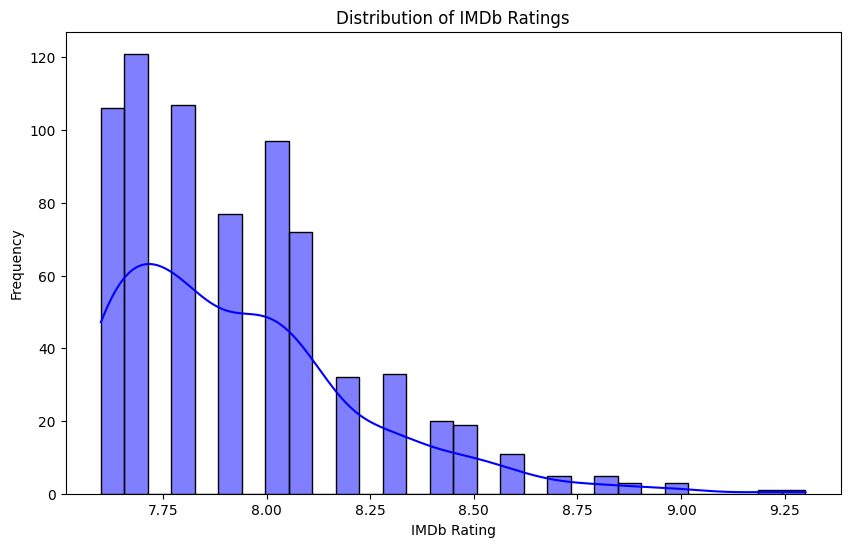

In [14]:
# Distribution of IMDb Ratings
# Plot a histogram of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

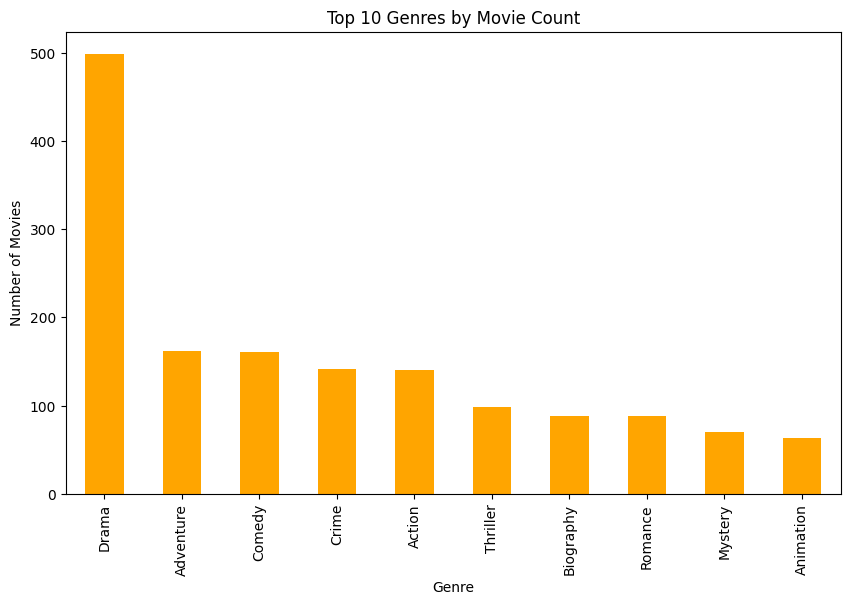

In [15]:
# Top 10 Genres by Movie Count
# Plot the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

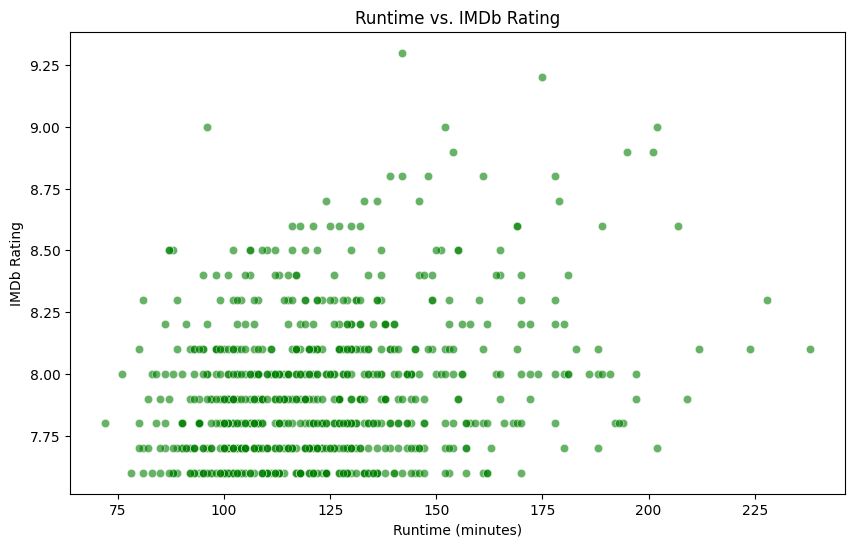

In [16]:
# Runtime vs. IMDb Rating
# Scatter plot of Runtime vs. IMDb Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, alpha=0.6, color='green')
plt.title('Runtime vs. IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

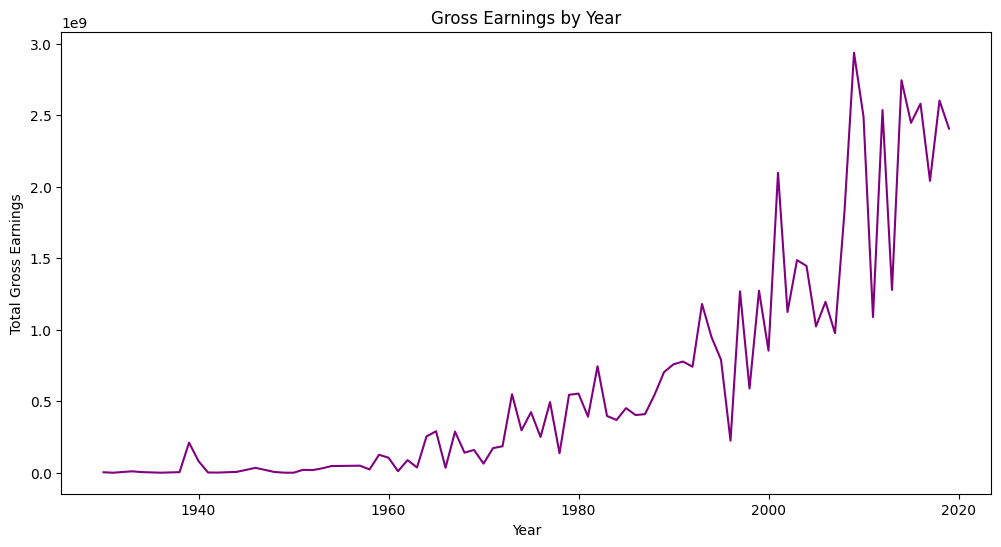

In [17]:
# Gross Earnings by Year
# Group by year and calculate total gross earnings
gross_by_year = df.groupby('Released_Year')['Gross'].sum()

# Plot gross earnings by year
plt.figure(figsize=(12, 6))
gross_by_year.plot(kind='line', color='purple')
plt.title('Gross Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.show()

## Key Insights

In [18]:
# Most Popular Genres
print("Most Popular Genres:")
print(genre_counts.head(5))

Most Popular Genres:
Drama        499
Adventure    162
Comedy       161
Crime        142
Action       140
Name: count, dtype: int64


In [19]:
# Correlation Between Runtime and Rating
correlation = df['Runtime'].corr(df['IMDB_Rating'])
print(f"Correlation between Runtime and IMDb Rating: {correlation:.2f}")

Correlation between Runtime and IMDb Rating: 0.26


In [20]:
# Top 5 Directors with Highest Average Ratings
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Directors by Average IMDb Rating:")
print(top_directors)

Top 5 Directors by Average IMDb Rating:
Director
Frank Darabont     8.95
Lana Wachowski     8.70
Irvin Kershner     8.70
George Lucas       8.60
Roberto Benigni    8.60
Name: IMDB_Rating, dtype: float64


In [21]:
# Year with the Highest Gross Earnings
max_gross_year = gross_by_year.idxmax()
max_gross_value = gross_by_year.max()
print(f"Year with the Highest Gross Earnings: {max_gross_year} (${max_gross_value:,.2f})")

Year with the Highest Gross Earnings: 2009.0 ($2,936,473,252.00)


## **Conclusion**

The analysis of the IMDb Top 1000 Movies dataset provided valuable insights into the characteristics of highly-rated films. Here are the key takeaways:


### 1. Dataset Overview
- The dataset contains **713 movies** after cleaning, with **16 variables** including movie title, release year, runtime, genre, IMDb rating, meta score, director, stars, number of votes, and gross earnings.


### 2. Summary Statistics
- The average IMDb rating of the movies is **7.94**, with a minimum of **7.6** and a maximum of **9.3**.
- The average runtime is **123.69 minutes**, with the longest movie being **238 minutes**.
- The average gross earnings per movie is **$78.38 million**, with the highest-grossing movie earning **$936.66 million**.


### 3. Top 10 Highest-Rated Movies
- The highest-rated movie is **"The Shawshank Redemption"** with an IMDb rating of **9.3**, followed by **"The Godfather"** (9.2) and **"The Dark Knight"** (9.0).


### 4. Most Popular Genres
- The most common genres in the dataset are **Drama** (499 movies), **Adventure** (162 movies), and **Comedy** (161 movies).
- **Drama** dominates the list, indicating its popularity among highly-rated films.


### 5. Average Runtime by Genre
- **Musicals** have the longest average runtime (**148.18 minutes**), followed by **History** (146.95 minutes) and **War** (138.79 minutes).
- **Animation** has the shortest average runtime (**99.79 minutes**).


### 6. Distribution of IMDb Ratings
- The IMDb ratings are **normally distributed**, with most movies rated between **7.6 and 8.5**.


### 7. Runtime vs. IMDb Rating
- There is a **weak positive correlation (0.26)** between runtime and IMDb rating, suggesting that longer movies tend to have slightly higher ratings.


### 8. Gross Earnings by Year
- The year **2009** had the highest total gross earnings (**$2.94 billion**), driven by blockbuster releases.


### 9. Top Directors
- **Frank Darabont** has the highest average IMDb rating (**8.95**), followed by **Lana Wachowski** and **Irvin Kershner** (8.70 each).


### 10. Key Insights
- **Drama** is the most popular genre among highly-rated movies.
- Longer movies (e.g., Musicals, History, and War genres) tend to have higher ratings.
- The year **2009** was the most profitable for the film industry, with the highest total gross earnings.



## **Recommendations**
- **For Moviegoers**: If you enjoy highly-rated movies, focus on **Drama** and **Adventure** genres, and explore works by top directors like **Frank Darabont** and **Irvin Kershner**.
- **For Filmmakers**: Consider producing **longer films** in genres like **Musicals** or **History**, as they tend to receive higher ratings.
- **For Investors**: Invest in movies released during **peak years** like **2009**, which saw the highest gross earnings.


## **Limitations**
- The dataset only includes movies from the **IMDb Top 1000**, which may not represent the entire film industry.
- Some columns (e.g., `Gross`) had missing values.


## **Future Work**
- Analyze the impact of **directors** and **actors** on movie ratings and earnings.
- Explore the relationship between **meta scores** and **IMDb ratings**.
- Investigate trends in **genre popularity** over time.

In [22]:
# Saving the cleaned dataset
df.to_csv('imdb_dataset_cleaned.csv', index=False)